In [2]:
import numpy as np
from PIL import Image
from Scripts import SpatialCorrelations as corr
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pymks
import pandas as pd
import os
from Scripts import velocityCalculations as vel
from Scripts import hoshenKopleman as hosh
import math
import time
from numpy import linalg as LA
import scipy

# Show image and progression

--- 5.1543238162994385 seconds ---


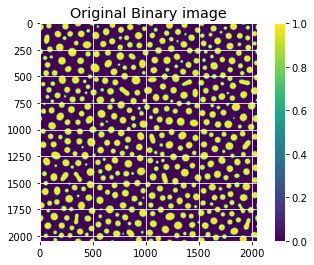

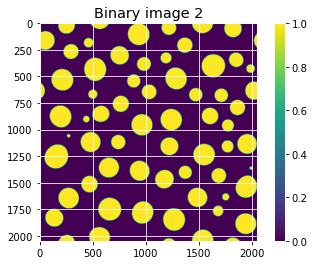

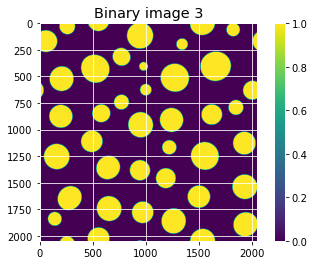

In [3]:
path = '/home/sushil/Desktop/adithya/ISOTROPIC/C03/'
list_of_files = os.listdir(path)
list_of_files.sort()
list_files = []
for i in list_of_files:
    if i[-5:]=='0.dat':
        list_files.append(path+i)
   
start_time = time.time()
img_ = corr.dat_to_numpy(list_files[30])
img_ = vel.gaussian_filter(img_,4)
img_ = (img_>0.5)*1
print("--- %s seconds ---" % (time.time() - start_time))
plt.imshow(img_)
plt.colorbar()
plt.title('Original Binary image')
plt.show()


img_1 = corr.dat_to_numpy(list_files[1000])
img_1 = vel.gaussian_filter(img_1,4)
img_1 = (img_1>0.5)*1
plt.imshow(img_1)
plt.colorbar()
plt.title('Binary image 2')
plt.show()

img_2 = corr.dat_to_numpy(list_files[1900])
img_2 = vel.gaussian_filter(img_2,4)
img_2 = (img_2>0.5)*1
plt.imshow(img_2)
plt.colorbar()
plt.title('Binary image 3')
plt.show()


In [4]:
len(list_files)

2000

# 2 point statistics

white-white


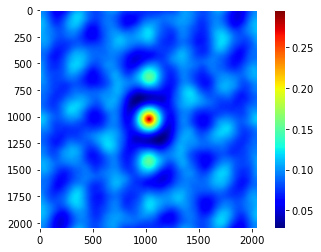

black-black


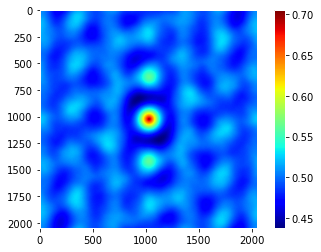

black-white


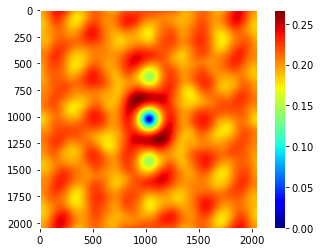

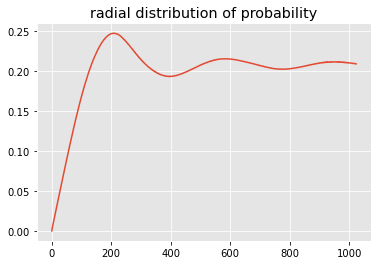

In [5]:
# AutoCorrelations

white_stats, black_stats = corr.auto_corr_from_code(img_2)
print('white-white')
plt.imshow(white_stats, cmap='jet')
plt.colorbar()
plt.grid(b=None)
plt.show()

print('black-black')
plt.imshow(black_stats, cmap='jet')
plt.colorbar()
plt.grid(b=None)
plt.show()

# Cross Correlations

cross = corr.cross_corr_from_code(img_2)
print('black-white')
plt.imshow(cross, cmap='jet')
plt.colorbar()
plt.grid(b=None)
plt.show()

#radial
r_val =corr.radialDistribution(cross)
plt.plot(r_val)
plt.title("radial distribution of probability")
plt.show()


# Velocity acc to level set methods, and further plots

In [6]:
start = time.time()
velocity = vel.velocityMagnitude(list_files, 1900, 3)
print(start-time.time())
velocity1 = vel.velocityDirection(list_files, 1900, 3)

print('Calculated Velocity')


-36.25974369049072
Calculated Velocity


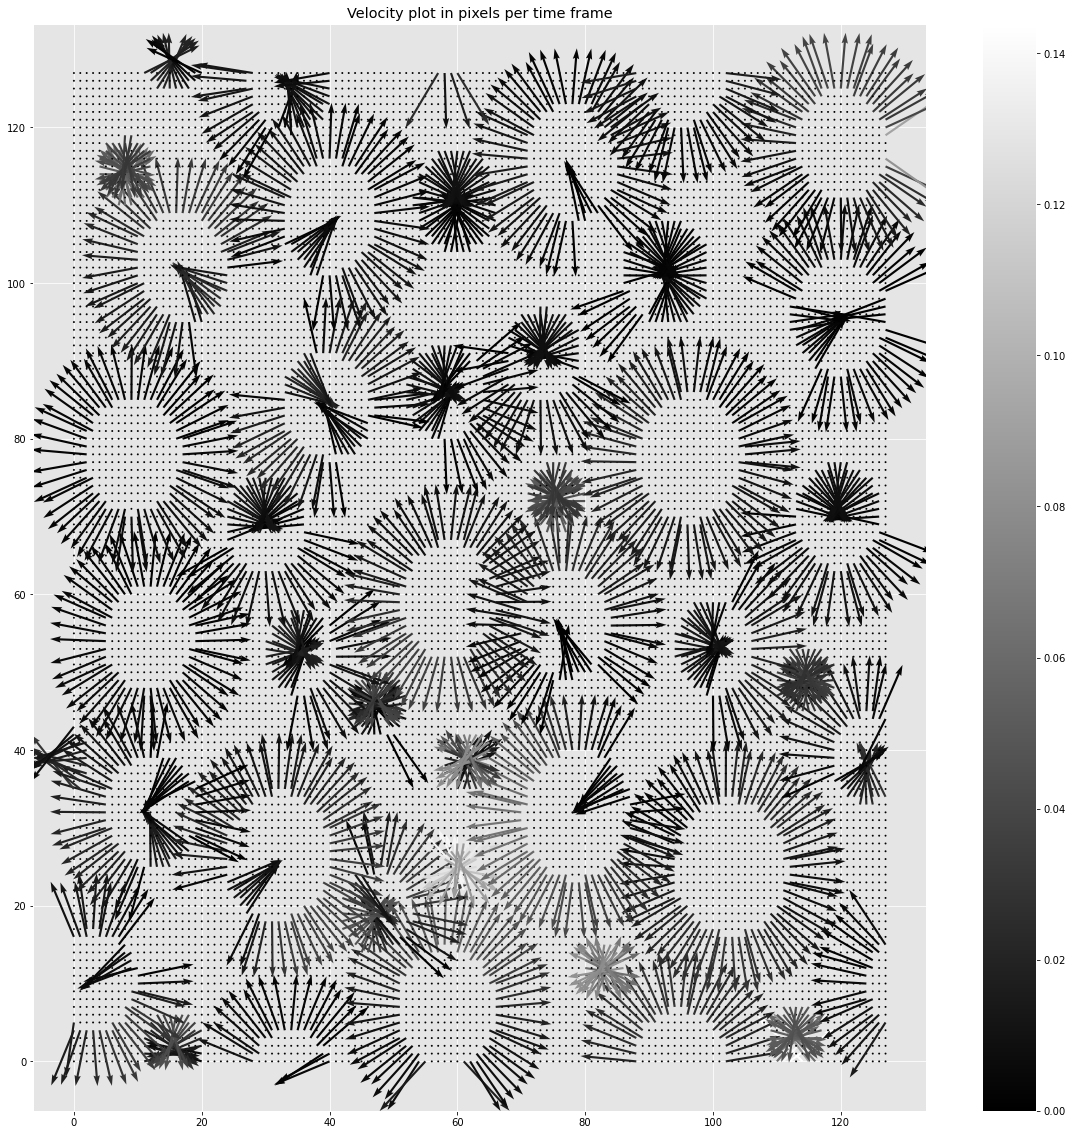

In [7]:
x = np.zeros((128,128))
y = np.zeros((128,128))
M = np.zeros((128,128))           
for i in range(0,128):
    for j in range(0,128):
        if np.max(velocity1[0][i*16:(i+1)*16,j*16:(j+1)*16])==0.0:
            x[i][j] = np.min(velocity1[0][i*16:(i+1)*16,j*16:(j+1)*16])
        else:
            x[i][j] = np.max(velocity1[0][i*16:(i+1)*16,j*16:(j+1)*16])
        if np.max(velocity1[1][i*16:(i+1)*16,j*16:(j+1)*16])==0.0:
            y[i][j] = np.min(velocity1[1][i*16:(i+1)*16,j*16:(j+1)*16])
        else:
            y[i][j] = np.max(velocity1[1][i*16:(i+1)*16,j*16:(j+1)*16])   


for i in range(0,128):
    for j in range(0,128):
        if np.max(velocity[i*16:(i+1)*16,j*16:(j+1)*16])==0.0:
            M[i][j] = np.min(velocity[i*16:(i+1)*16,j*16:(j+1)*16])
        else:
            M[i][j] = np.max(velocity[i*16:(i+1)*16,j*16:(j+1)*16])


y = y*np.sign(M)
x = x*np.sign(M)
Fx = y
Fy = x
x_ = np.arange(0,128)
y_ = np.arange(0,128)
        
X, Y = np.meshgrid(x_,y_)

#plt.axes([0.065, 0.065, 0.9, 0.9])
plt.rcParams["figure.figsize"] = (20,20)
qq =plt.quiver(X, Y, Fx, Fy,np.abs(M),scale = 16,cmap=plt.cm.gray)
plt.colorbar(qq,cmap=plt.cm.jet)
plt.title('Velocity plot in pixels per time frame')
plt.show()

# Hoshen Kopleman plots

14.633518695831299  seconds
total number of ppts : 38


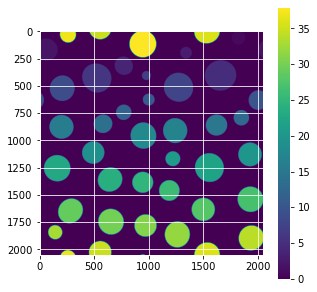

In [8]:
img_1 = corr.dat_to_numpy(list_files[1900])
img_1 = vel.gaussian_filter(img_1,5)
img_1 = (img_1>0.5)*1
start= time.time()
labels = hosh.hoshenKoplemanLabels(img_1)
print(time.time()-start, ' seconds')
plt.rcParams["figure.figsize"] = (5,5)
plt.imshow(labels)
plt.colorbar()
print('total number of ppts :', np.max(labels))

Text(0.5, 1.0, 'Size Distribution')

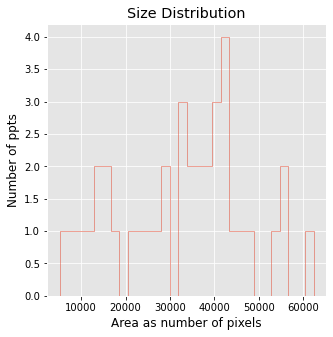

In [9]:
h =plt.hist(hosh.areaDistribution(labels), bins= 30,histtype=u'step')
plt.xlabel('Area as number of pixels')
plt.ylabel('Number of ppts')
plt.title('Size Distribution')

# Choosing ppt 1  and verifying calculations

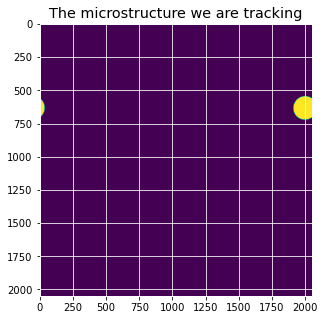

In [10]:
theChosenOne = 10
plt.rcParams["figure.figsize"] = (5,5)
plt.imshow(labels==theChosenOne)
plt.title('The microstructure we are tracking')
plt.show()

### Calculating Centre of mass for tracking

In [11]:
cog = hosh.precipitateCentres(labels,theChosenOne)
start= time.time()
theta, l, b, eig = hosh.findAngleMajorMinorEigenvector(labels,theChosenOne)
print('COG',cog)
print(theta,l, b, eig)
print(time.time()-start, ' seconds')

COG (631, 1995)
26.273413326230184 177.84302954097063 175.04633178393507 [[-0.89669193  0.44265515]
 [-0.44265515 -0.89669193]]
99.31230521202087  seconds


In [64]:
img_1 = corr.dat_to_numpy(list_files[41])
img_1 = vel.gaussian_filter(img_1,5)
img_1 = (img_1>0.5)*1

img_2 = corr.dat_to_numpy(list_files[46])
img_2 = vel.gaussian_filter(img_2,5)
img_2 = (img_2>0.5)*1

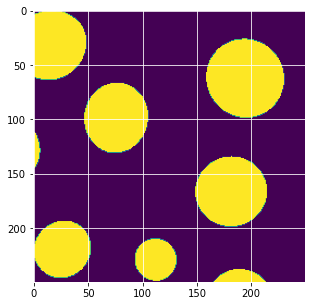

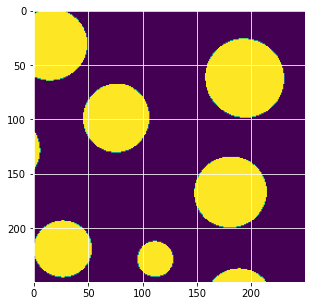

In [66]:
plt.imshow(img_1[1000:1250,750:1000])
plt.show()
plt.imshow(img_2[1000:1250,750:1000])
plt.show()

16.511111974716187  seconds
total number of ppts : 405


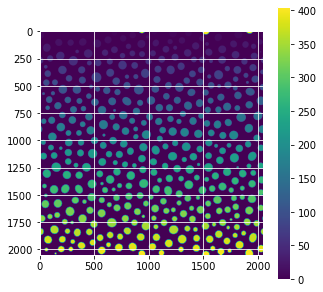

In [5]:
img_1 = corr.dat_to_numpy(list_files[41])
img_1 = vel.gaussian_filter(img_1,5)
img_1 = (img_1>0.5)*1
start= time.time()
labels = hosh.hoshenKoplemanLabels(img_1)
print(time.time()-start, ' seconds')
plt.rcParams["figure.figsize"] = (5,5)
plt.imshow(labels)
plt.colorbar()
print('total number of ppts :', np.max(labels))

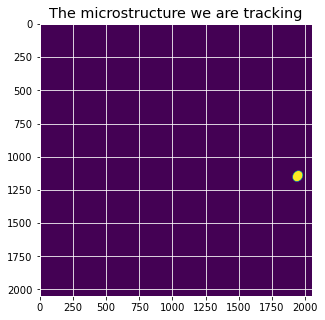

In [6]:
theChosenOne = 223
plt.rcParams["figure.figsize"] = (5,5)
plt.imshow(labels==theChosenOne)
plt.title('The microstructure we are tracking')
plt.show()

In [7]:
cog = hosh.precipitateCentres(labels,theChosenOne)
cog

(1145, 1940)

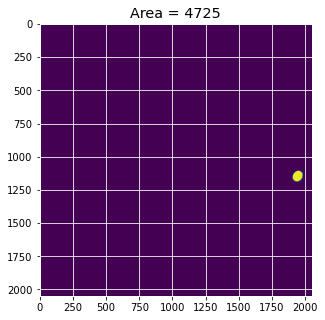

MicroStructure Number,  41
theta =  34.81044792115251
l/b =  1.2019418598393694
time for  0  =  22.51783514022827
----------------------------------------------------------------------------


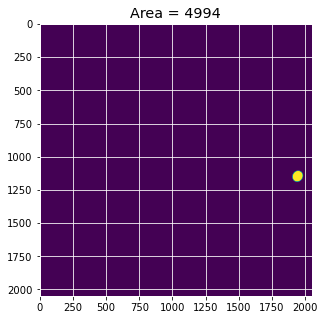

MicroStructure Number,  46
theta =  31.466380929375376
l/b =  1.1229143350816355
time for  1  =  22.70168924331665
----------------------------------------------------------------------------


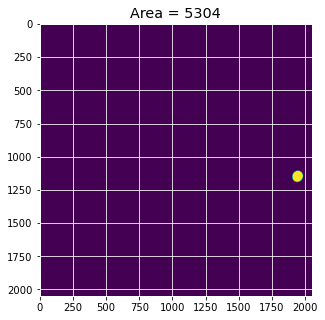

MicroStructure Number,  51
theta =  26.164730395057532
l/b =  1.0958706628952903
time for  2  =  22.73289203643799
----------------------------------------------------------------------------


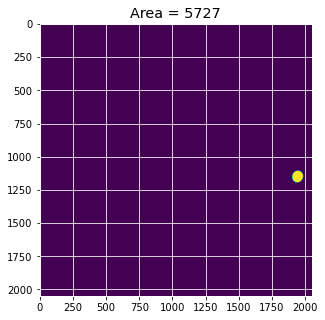

MicroStructure Number,  56
theta =  20.59441361276746
l/b =  1.1034066162996017
time for  3  =  22.84416627883911
----------------------------------------------------------------------------


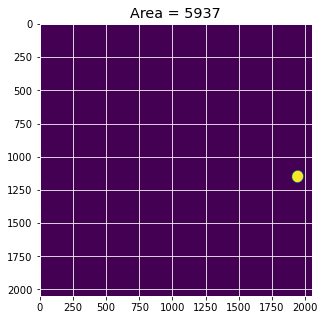

MicroStructure Number,  61
theta =  15.549315148394285
l/b =  1.0677230555501045
time for  4  =  22.395363807678223
----------------------------------------------------------------------------


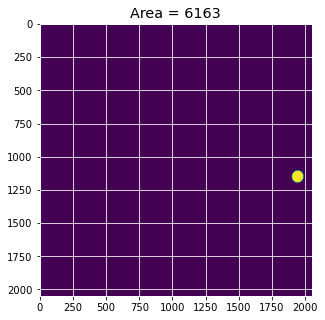

MicroStructure Number,  66
theta =  8.743900748964935
l/b =  1.0469434721547515
time for  5  =  22.321120023727417
----------------------------------------------------------------------------


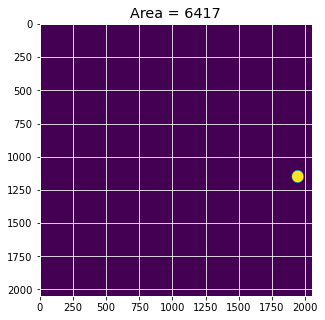

MicroStructure Number,  71
theta =  -1.385068363890461
l/b =  1.0416749276278185
time for  6  =  23.846688508987427
----------------------------------------------------------------------------


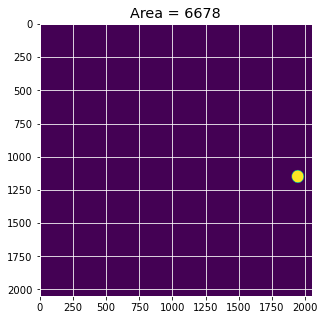

MicroStructure Number,  76
theta =  -9.430159603663679
l/b =  1.045545750093341
time for  7  =  22.86385941505432
----------------------------------------------------------------------------


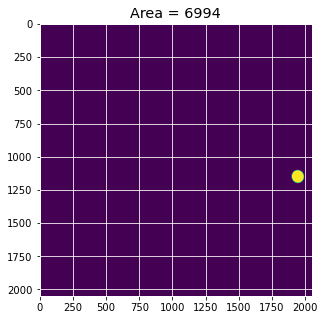

MicroStructure Number,  81
theta =  -13.504998174914384
l/b =  1.0543248264525846
time for  8  =  23.232889890670776
----------------------------------------------------------------------------


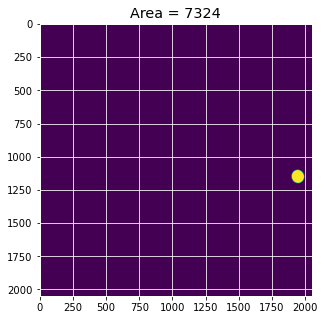

MicroStructure Number,  86
theta =  -16.41053993331968
l/b =  1.0644197815294465
time for  9  =  23.79009699821472
----------------------------------------------------------------------------


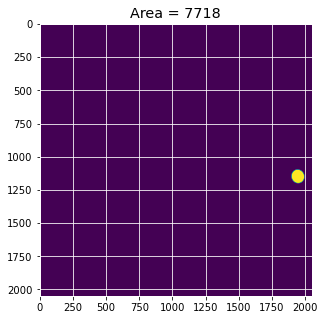

MicroStructure Number,  91
theta =  -19.243674454544994
l/b =  1.0803335037600836
time for  10  =  22.897857666015625
----------------------------------------------------------------------------


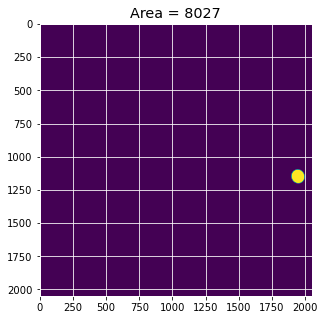

MicroStructure Number,  96
theta =  -22.975413284152214
l/b =  1.0737614834842566
time for  11  =  22.702388763427734
----------------------------------------------------------------------------


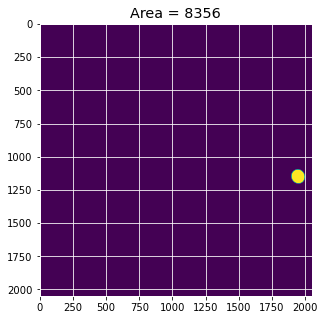

MicroStructure Number,  101
theta =  -25.659241666736122
l/b =  1.0757345894361203
time for  12  =  22.94238018989563
----------------------------------------------------------------------------


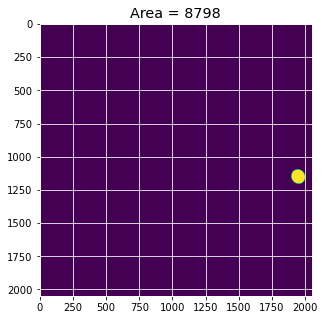

MicroStructure Number,  106
theta =  -29.77587263887655
l/b =  1.0856956543586056
time for  13  =  22.677706241607666
----------------------------------------------------------------------------


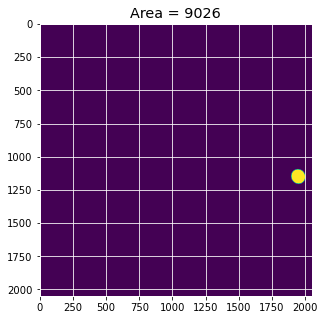

MicroStructure Number,  111
theta =  -29.256676381377535
l/b =  1.0676126291776007
time for  14  =  22.922476291656494
----------------------------------------------------------------------------


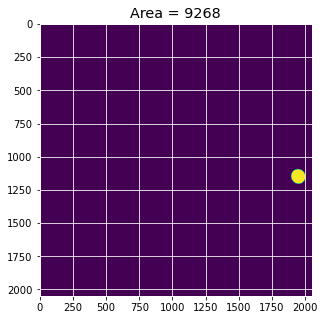

MicroStructure Number,  116
theta =  -29.62480250913355
l/b =  1.0521997808382306
time for  15  =  23.063865184783936
----------------------------------------------------------------------------


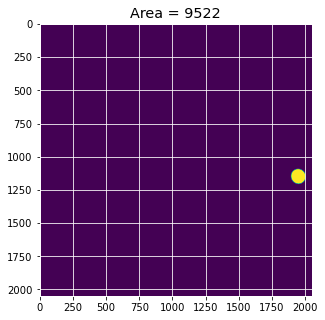

MicroStructure Number,  121
theta =  -29.528790392404503
l/b =  1.0409815743108992
time for  16  =  22.53318476676941
----------------------------------------------------------------------------


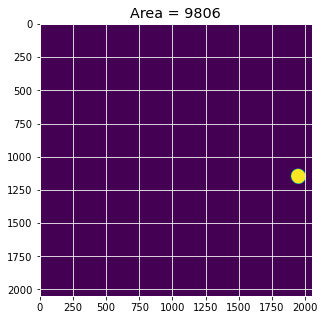

MicroStructure Number,  126
theta =  -28.97019765600642
l/b =  1.0329046749653623
time for  17  =  23.745427131652832
----------------------------------------------------------------------------


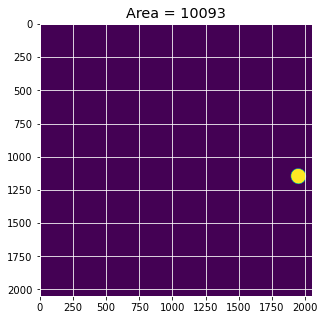

MicroStructure Number,  131
theta =  -27.77496139052091
l/b =  1.0260560393527423
time for  18  =  23.52644157409668
----------------------------------------------------------------------------


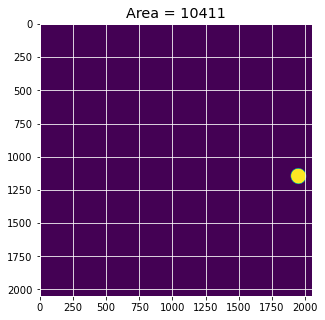

MicroStructure Number,  136
theta =  -28.431577598859384
l/b =  1.0233343350014867
time for  19  =  23.34894108772278
----------------------------------------------------------------------------


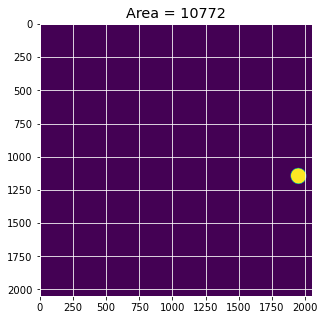

MicroStructure Number,  141
theta =  -28.514625996154017
l/b =  1.0235323733385193
time for  20  =  24.360405445098877
----------------------------------------------------------------------------


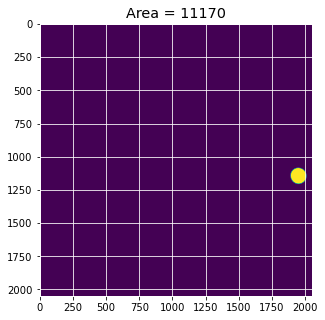

MicroStructure Number,  146
theta =  -30.613163898677357
l/b =  1.026167714809316
time for  21  =  24.143621683120728
----------------------------------------------------------------------------


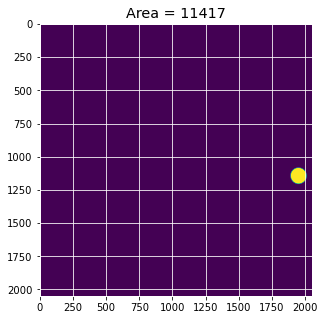

MicroStructure Number,  151
theta =  -21.805218427031672
l/b =  1.0130681457670097
time for  22  =  22.90872597694397
----------------------------------------------------------------------------


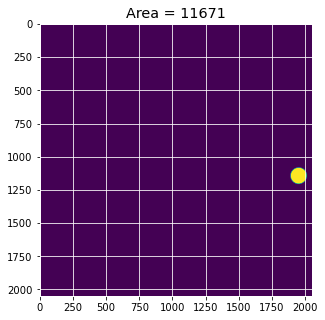

MicroStructure Number,  156
theta =  19.78027891063249
l/b =  1.0071741452266838
time for  23  =  23.243120908737183
----------------------------------------------------------------------------


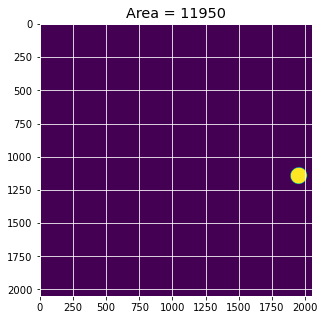

MicroStructure Number,  161
theta =  44.162245636074964
l/b =  1.0174579350869277
time for  24  =  23.516103744506836
----------------------------------------------------------------------------


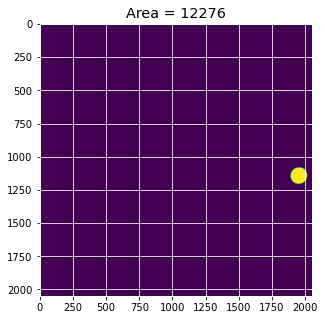

MicroStructure Number,  166
theta =  -42.48960832485342
l/b =  1.0309717877680455
time for  25  =  22.750157356262207
----------------------------------------------------------------------------


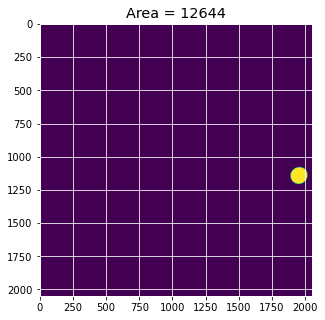

MicroStructure Number,  171
theta =  -40.70553661731974
l/b =  1.0466157503881506
time for  26  =  22.87212371826172
----------------------------------------------------------------------------


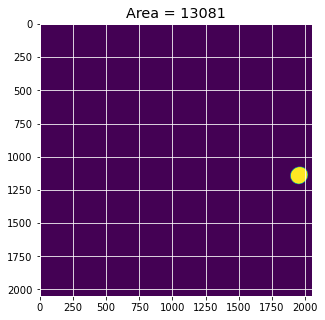

MicroStructure Number,  176
theta =  -40.09949908774416
l/b =  1.0668077368014564
time for  27  =  22.61341881752014
----------------------------------------------------------------------------


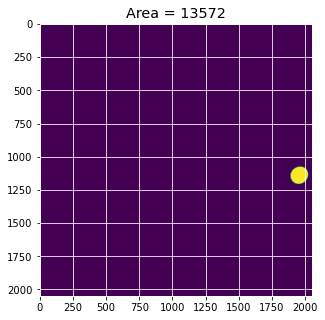

MicroStructure Number,  181
theta =  -39.51359456681719
l/b =  1.0851790370531327
time for  28  =  23.006935834884644
----------------------------------------------------------------------------


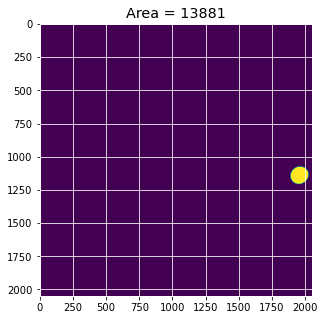

MicroStructure Number,  186
theta =  -33.850859390577455
l/b =  1.0827041526066488
time for  29  =  23.16303849220276
----------------------------------------------------------------------------


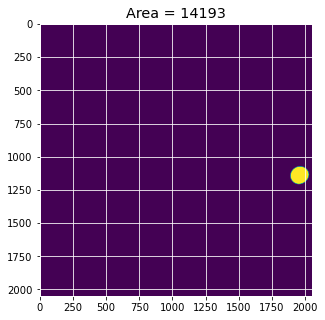

MicroStructure Number,  191
theta =  -29.686340308790363
l/b =  1.0813453150163164
time for  30  =  23.195655584335327
----------------------------------------------------------------------------


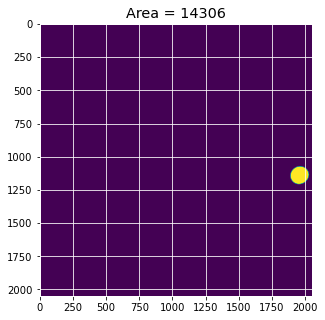

MicroStructure Number,  196
theta =  -30.743750510836502
l/b =  1.0711749993020176
time for  31  =  23.539379835128784
----------------------------------------------------------------------------


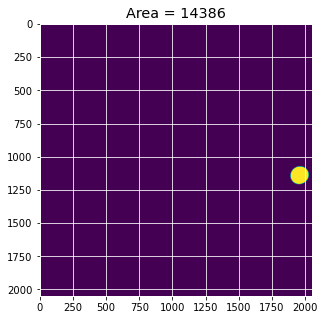

MicroStructure Number,  201
theta =  -31.518966815716333
l/b =  1.06266353578316
time for  32  =  23.4185311794281
----------------------------------------------------------------------------


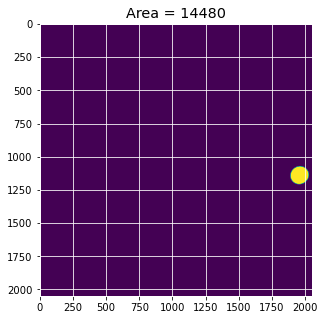

MicroStructure Number,  206
theta =  -32.800548995589125
l/b =  1.0548733223980282
time for  33  =  23.13901400566101
----------------------------------------------------------------------------


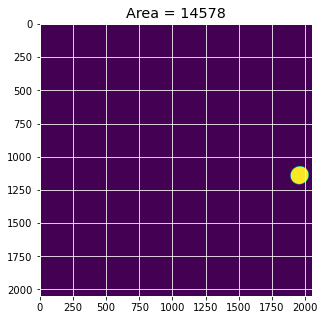

MicroStructure Number,  211
theta =  -34.52914518370083
l/b =  1.0475941233078352
time for  34  =  22.477696657180786
----------------------------------------------------------------------------


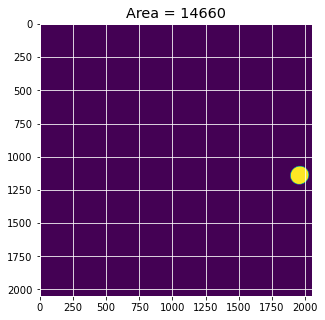

MicroStructure Number,  216
theta =  -35.22427982117794
l/b =  1.0418482814796506
time for  35  =  22.53142213821411
----------------------------------------------------------------------------


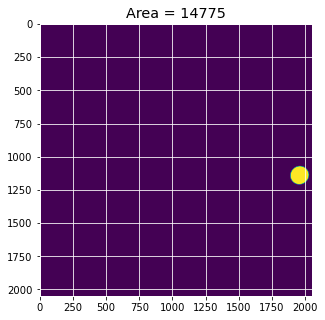

MicroStructure Number,  221
theta =  -38.300159087808844
l/b =  1.0359375608313552
time for  36  =  22.2979953289032
----------------------------------------------------------------------------


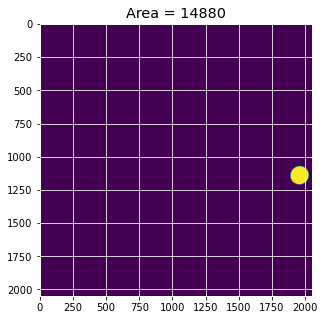

MicroStructure Number,  226
theta =  -40.01613516908981
l/b =  1.029333271719652
time for  37  =  23.00239634513855
----------------------------------------------------------------------------


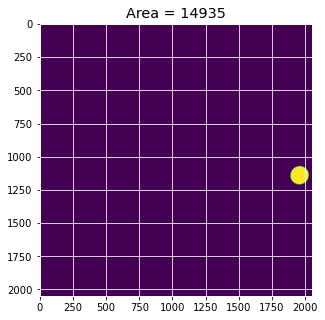

MicroStructure Number,  231
theta =  -42.021683711567476
l/b =  1.0269261936892145
time for  38  =  22.594238758087158
----------------------------------------------------------------------------


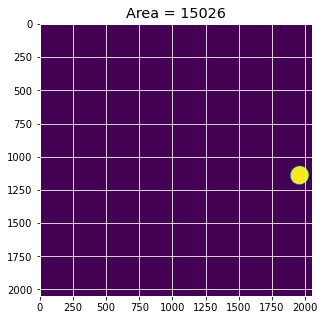

MicroStructure Number,  236
theta =  42.784037275548584
l/b =  1.0252187560807762
time for  39  =  22.637121438980103
----------------------------------------------------------------------------


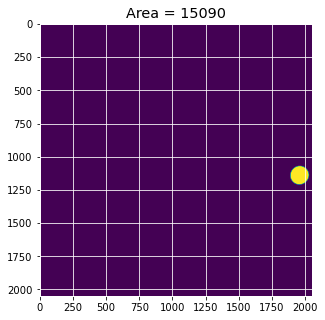

MicroStructure Number,  241
theta =  39.22574072557954
l/b =  1.0249374391338606
time for  40  =  23.192818880081177
----------------------------------------------------------------------------


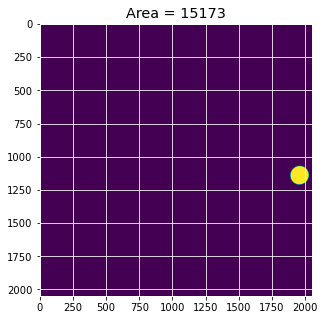

MicroStructure Number,  246
theta =  37.33458657903466
l/b =  1.0232330520742354
time for  41  =  24.774791717529297
----------------------------------------------------------------------------


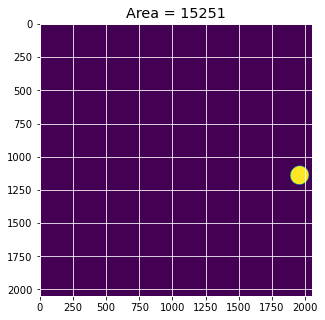

MicroStructure Number,  251
theta =  33.505821803019955
l/b =  1.022585402720354
time for  42  =  23.328973054885864
----------------------------------------------------------------------------


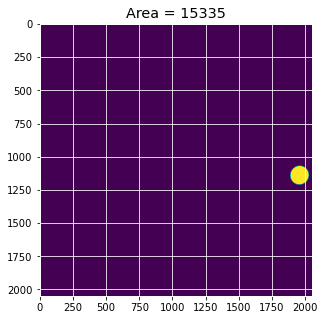

MicroStructure Number,  256
theta =  28.508981318589537
l/b =  1.0218064374610891
time for  43  =  23.77689814567566
----------------------------------------------------------------------------


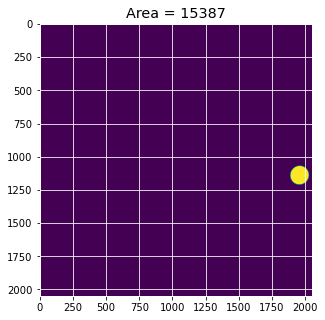

MicroStructure Number,  261
theta =  28.753155402142564
l/b =  1.021330808419472
time for  44  =  23.073136568069458
----------------------------------------------------------------------------


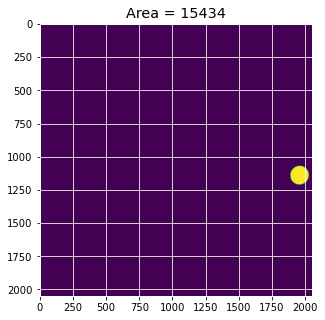

MicroStructure Number,  266
theta =  26.866513279144613
l/b =  1.0218760483009508
time for  45  =  23.17615032196045
----------------------------------------------------------------------------


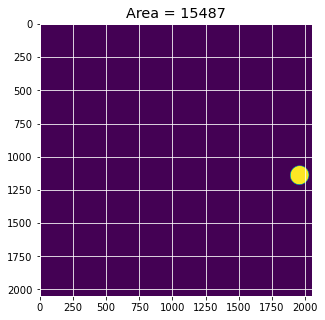

MicroStructure Number,  271
theta =  25.168564916432047
l/b =  1.0228976169806647
time for  46  =  23.201422452926636
----------------------------------------------------------------------------


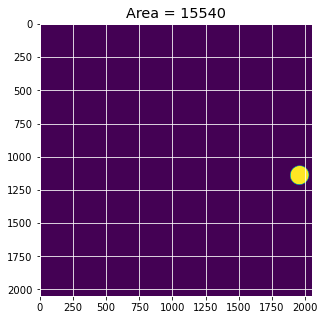

MicroStructure Number,  276
theta =  25.00558568995799
l/b =  1.022626955133261
time for  47  =  23.74676489830017
----------------------------------------------------------------------------


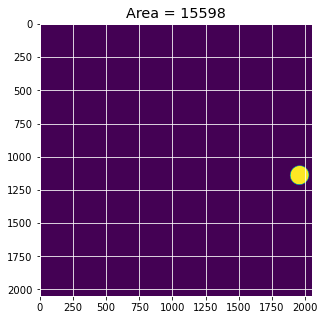

MicroStructure Number,  281
theta =  23.647029226008975
l/b =  1.0222152640378916
time for  48  =  22.494327783584595
----------------------------------------------------------------------------


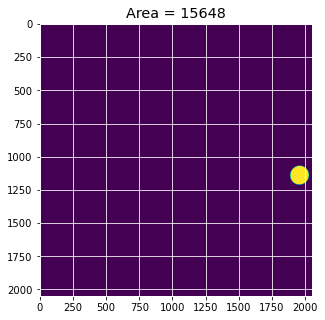

MicroStructure Number,  286
theta =  24.395667484540017
l/b =  1.022035547200867
time for  49  =  23.012080192565918
----------------------------------------------------------------------------


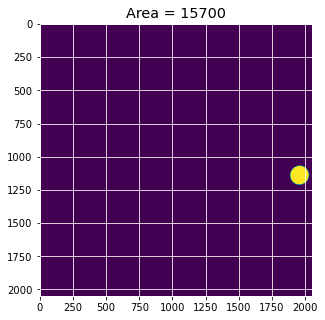

MicroStructure Number,  291
theta =  25.275250988294005
l/b =  1.0219482588465914
time for  50  =  23.40686821937561
----------------------------------------------------------------------------


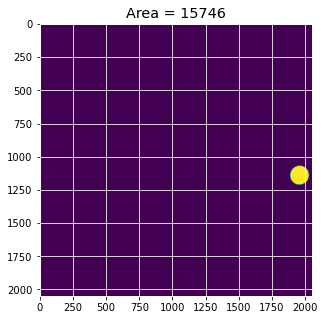

MicroStructure Number,  296
theta =  25.96625645110937
l/b =  1.0218050396707814
time for  51  =  22.375957489013672
----------------------------------------------------------------------------


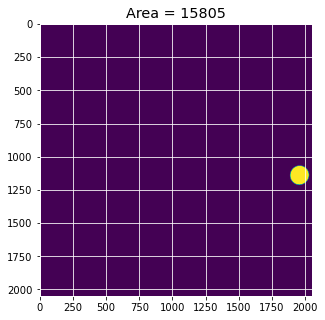

MicroStructure Number,  301
theta =  25.13135545638008
l/b =  1.02267630122764
time for  52  =  22.348569631576538
----------------------------------------------------------------------------


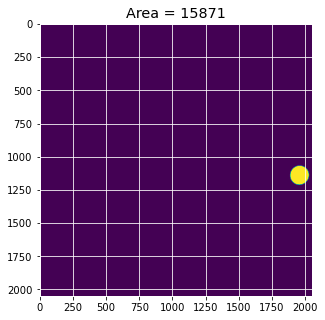

MicroStructure Number,  306
theta =  25.009945651114116
l/b =  1.0226661171202918
time for  53  =  23.485278844833374
----------------------------------------------------------------------------


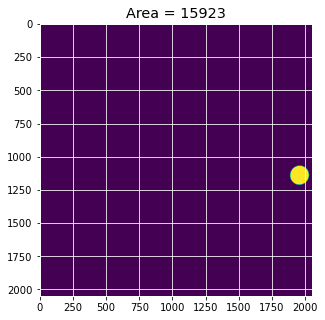

MicroStructure Number,  311
theta =  23.989256644542742
l/b =  1.0237569658679857
time for  54  =  23.18690037727356
----------------------------------------------------------------------------


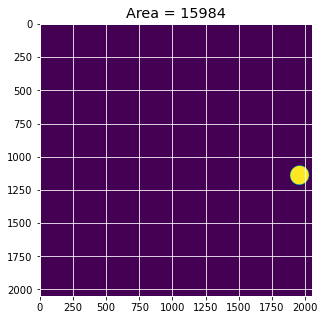

MicroStructure Number,  316
theta =  24.14821054122237
l/b =  1.0234934025019544
time for  55  =  23.19876217842102
----------------------------------------------------------------------------


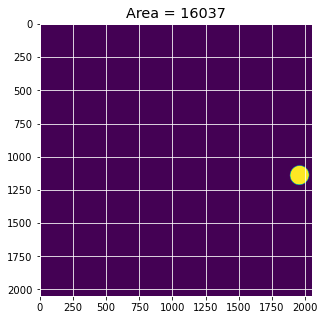

MicroStructure Number,  321
theta =  24.372328003783295
l/b =  1.0243390398318841
time for  56  =  22.95424795150757
----------------------------------------------------------------------------


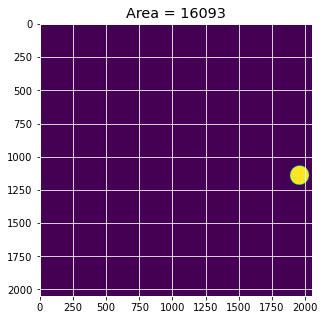

MicroStructure Number,  326
theta =  24.243814692412396
l/b =  1.0234339256091
time for  57  =  23.462564945220947
----------------------------------------------------------------------------


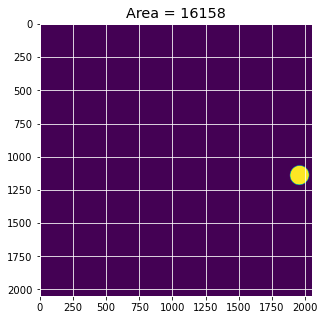

MicroStructure Number,  331
theta =  24.1805572602119
l/b =  1.0247145576642178
time for  58  =  22.81744360923767
----------------------------------------------------------------------------


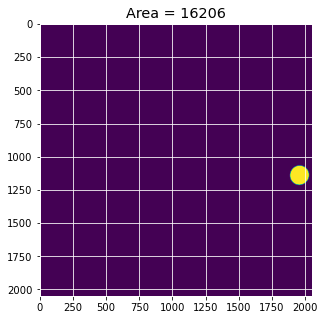

MicroStructure Number,  336
theta =  23.94099301656361
l/b =  1.025880444584805
time for  59  =  23.45444369316101
----------------------------------------------------------------------------


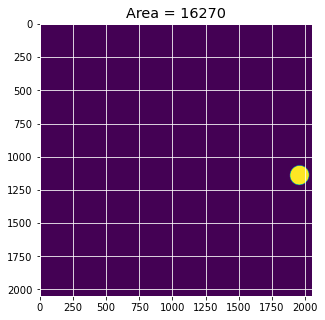

MicroStructure Number,  341
theta =  24.24749936715024
l/b =  1.0267362116378507
time for  60  =  23.064507007598877
----------------------------------------------------------------------------


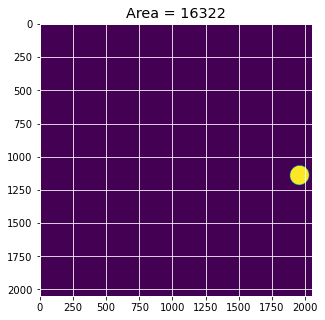

MicroStructure Number,  346
theta =  24.44478339870609
l/b =  1.0269677696100428
time for  61  =  23.219735622406006
----------------------------------------------------------------------------


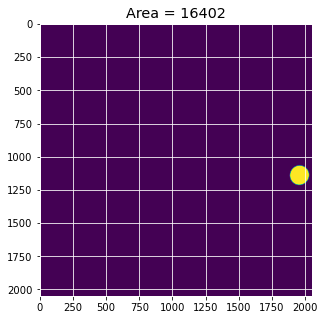

MicroStructure Number,  351
theta =  24.157607019233375
l/b =  1.0269246944659298
time for  62  =  22.863945245742798
----------------------------------------------------------------------------


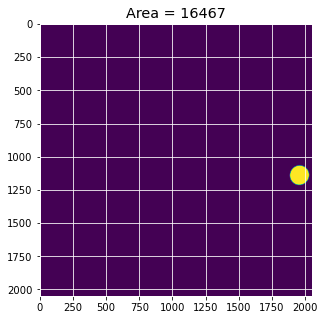

MicroStructure Number,  356
theta =  24.663216559029877
l/b =  1.026586303577955
time for  63  =  23.792917728424072
----------------------------------------------------------------------------


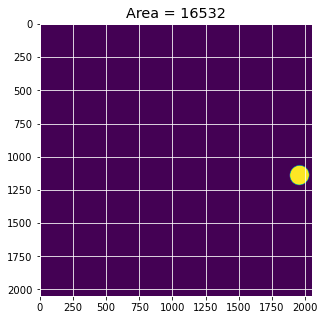

MicroStructure Number,  361
theta =  25.089327437640307
l/b =  1.027592643632576
time for  64  =  23.387290239334106
----------------------------------------------------------------------------


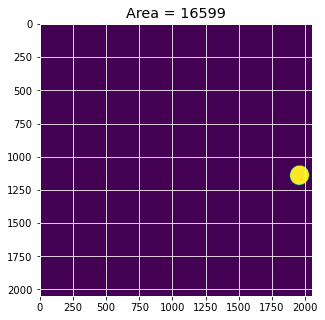

MicroStructure Number,  366
theta =  24.40532603197757
l/b =  1.029271938909599
time for  65  =  22.68571710586548
----------------------------------------------------------------------------


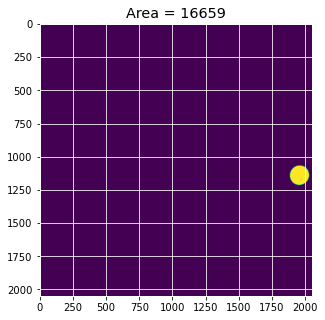

MicroStructure Number,  371
theta =  24.729472228408817
l/b =  1.0299666551631865
time for  66  =  22.545326709747314
----------------------------------------------------------------------------


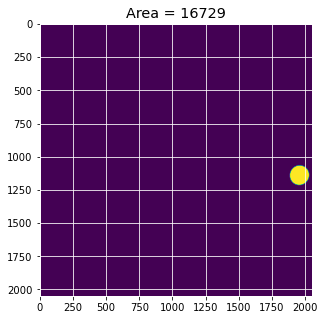

MicroStructure Number,  376
theta =  24.646926025367016
l/b =  1.0307266418125864
time for  67  =  23.599422454833984
----------------------------------------------------------------------------


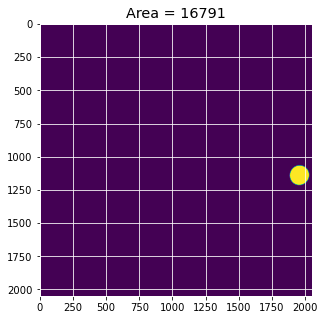

MicroStructure Number,  381
theta =  25.368122104220124
l/b =  1.029869537162899
time for  68  =  23.026018381118774
----------------------------------------------------------------------------


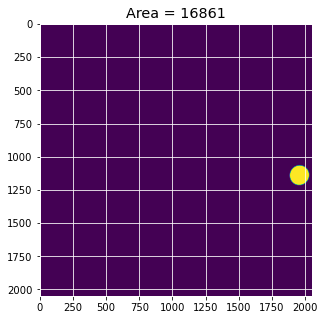

MicroStructure Number,  386
theta =  24.925435246696864
l/b =  1.0304475996121434
time for  69  =  23.42680025100708
----------------------------------------------------------------------------


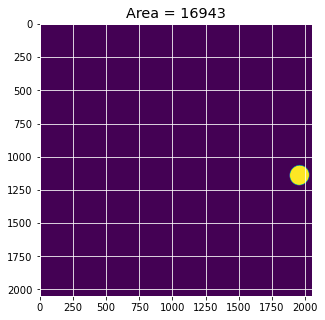

MicroStructure Number,  391
theta =  24.796390367309876
l/b =  1.0335461279377163
time for  70  =  23.17554783821106
----------------------------------------------------------------------------


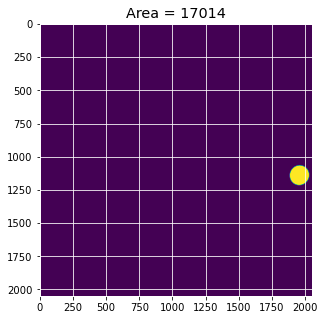

MicroStructure Number,  396
theta =  24.859408192825803
l/b =  1.0346022129848145
time for  71  =  23.983484506607056
----------------------------------------------------------------------------


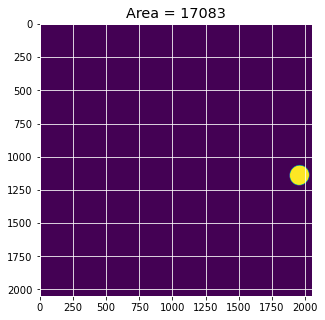

MicroStructure Number,  401
theta =  24.9468700564204
l/b =  1.035222753301446
time for  72  =  23.855143308639526
----------------------------------------------------------------------------


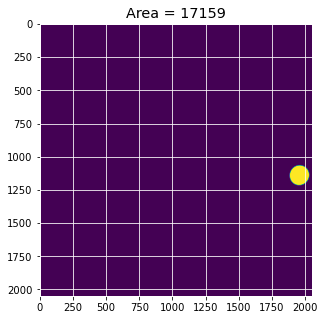

MicroStructure Number,  406
theta =  25.649240293754612
l/b =  1.0354969139785783
time for  73  =  23.512231588363647
----------------------------------------------------------------------------


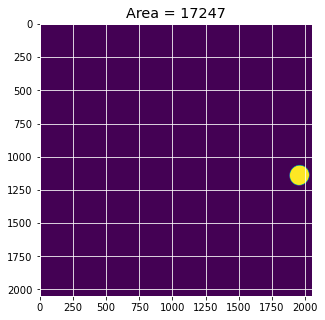

MicroStructure Number,  411
theta =  25.469780871148018
l/b =  1.0364272208532448
time for  74  =  23.52780055999756
----------------------------------------------------------------------------


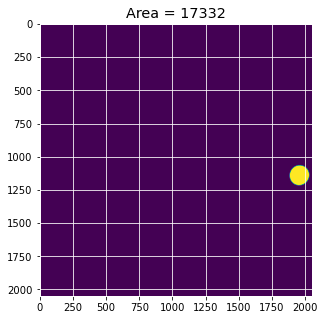

MicroStructure Number,  416
theta =  26.020625322451156
l/b =  1.0379390733422726
time for  75  =  23.078425645828247
----------------------------------------------------------------------------


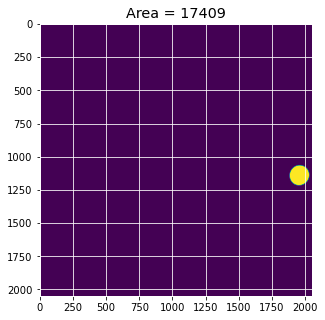

MicroStructure Number,  421
theta =  26.034551979913175
l/b =  1.0397591851928518
time for  76  =  22.62518000602722
----------------------------------------------------------------------------


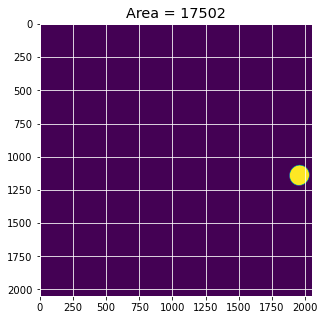

MicroStructure Number,  426
theta =  25.571693952366843
l/b =  1.0426874368961003
time for  77  =  23.211459398269653
----------------------------------------------------------------------------


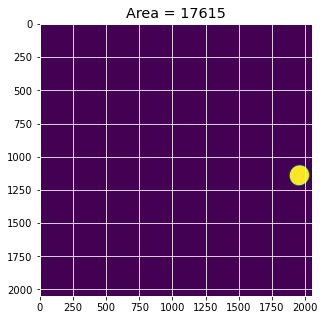

MicroStructure Number,  431
theta =  25.24003325932076
l/b =  1.046753242726706
time for  78  =  22.716976165771484
----------------------------------------------------------------------------


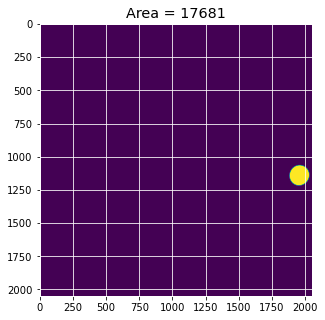

MicroStructure Number,  436
theta =  25.318584140680716
l/b =  1.0451828735338933
time for  79  =  22.807926177978516
----------------------------------------------------------------------------


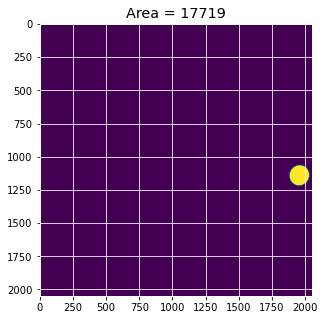

MicroStructure Number,  441
theta =  25.534516204682625
l/b =  1.0432891646265567
time for  80  =  22.861559867858887
----------------------------------------------------------------------------


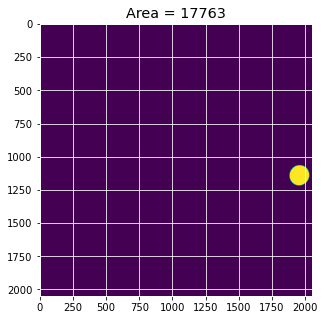

MicroStructure Number,  446
theta =  25.21093443128869
l/b =  1.041609499739662
time for  81  =  23.287872076034546
----------------------------------------------------------------------------


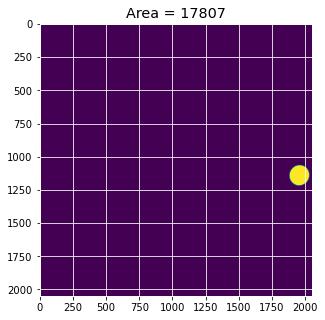

MicroStructure Number,  451
theta =  25.668088382182088
l/b =  1.0396883292484047
time for  82  =  23.295403480529785
----------------------------------------------------------------------------


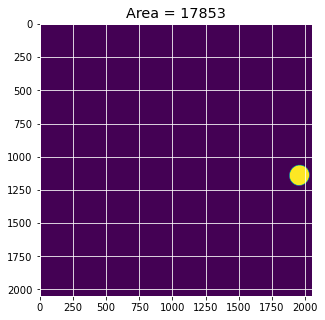

MicroStructure Number,  456
theta =  25.66111410138915
l/b =  1.0381736427495343
time for  83  =  23.445650815963745
----------------------------------------------------------------------------


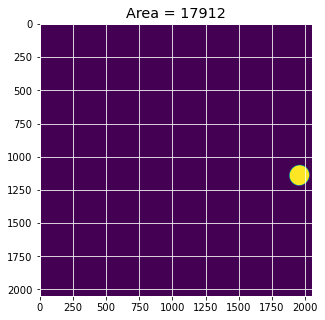

MicroStructure Number,  461
theta =  25.140852423010884
l/b =  1.0361292862041884
time for  84  =  23.359291076660156
----------------------------------------------------------------------------


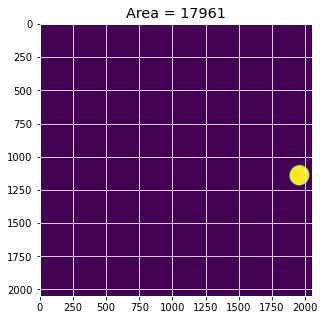

MicroStructure Number,  466
theta =  25.019631963753078
l/b =  1.035389821045688
time for  85  =  23.335030794143677
----------------------------------------------------------------------------


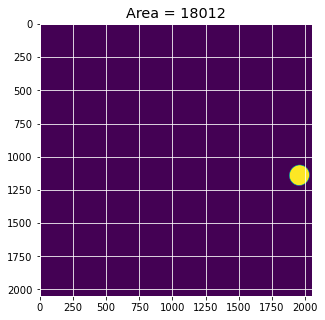

MicroStructure Number,  471
theta =  25.352438719142846
l/b =  1.0338192503400692
time for  86  =  22.72573471069336
----------------------------------------------------------------------------


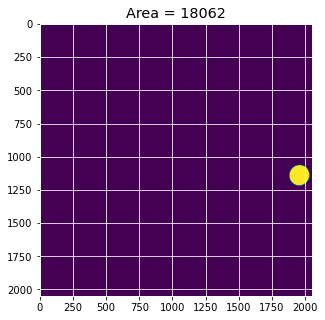

MicroStructure Number,  476
theta =  25.317569668255477
l/b =  1.0328130693286357
time for  87  =  22.84253168106079
----------------------------------------------------------------------------


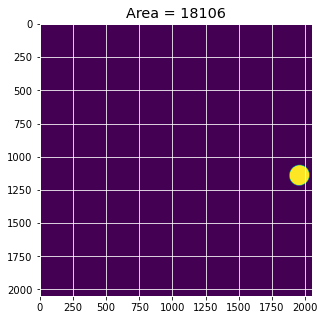

MicroStructure Number,  481
theta =  25.494824796318593
l/b =  1.032372048945283
time for  88  =  22.930636167526245
----------------------------------------------------------------------------


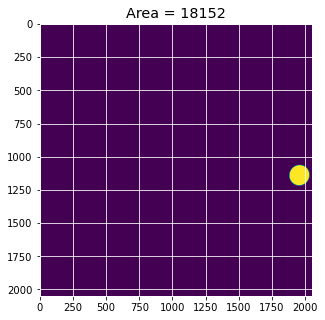

MicroStructure Number,  486
theta =  26.00316373444004
l/b =  1.031210579058843
time for  89  =  23.274768114089966
----------------------------------------------------------------------------


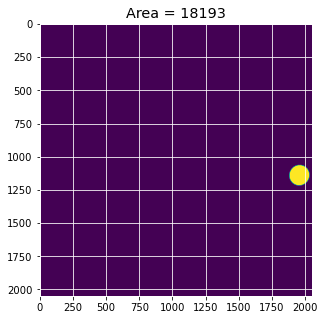

MicroStructure Number,  491
theta =  26.411059397887893
l/b =  1.0307724211569824
time for  90  =  23.894578456878662
----------------------------------------------------------------------------


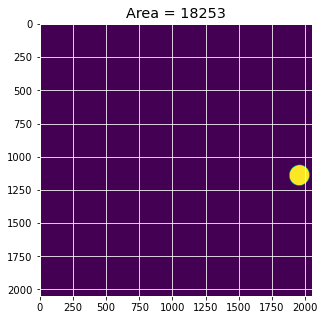

MicroStructure Number,  496
theta =  25.439710081344664
l/b =  1.0297551477119813
time for  91  =  22.922388792037964
----------------------------------------------------------------------------


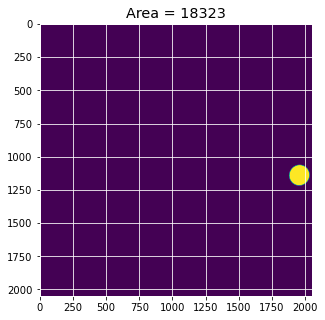

MicroStructure Number,  501
theta =  26.128700067739416
l/b =  1.028738671881639
time for  92  =  22.363767862319946
----------------------------------------------------------------------------


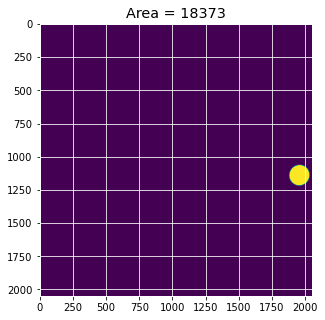

MicroStructure Number,  506
theta =  26.431683667092777
l/b =  1.0277918919562772
time for  93  =  22.97699475288391
----------------------------------------------------------------------------


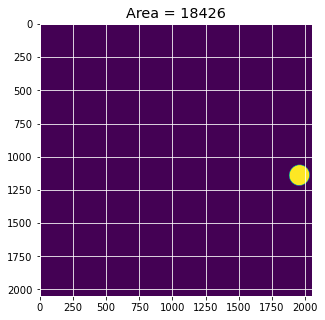

MicroStructure Number,  511
theta =  26.644281949223824
l/b =  1.027487520856764
time for  94  =  22.762962818145752
----------------------------------------------------------------------------


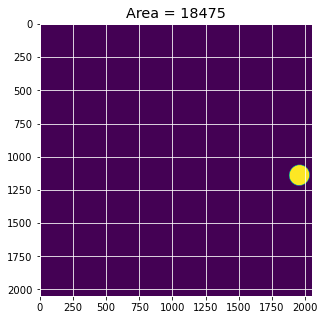

MicroStructure Number,  516
theta =  26.39927611595735
l/b =  1.0265060734977138
time for  95  =  24.23581552505493
----------------------------------------------------------------------------


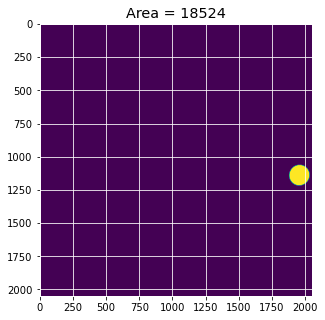

MicroStructure Number,  521
theta =  27.46643876979404
l/b =  1.0268194819843384
time for  96  =  23.78529667854309
----------------------------------------------------------------------------


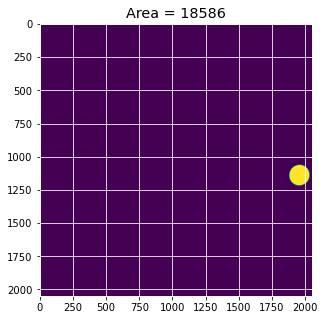

MicroStructure Number,  526
theta =  26.473989753671596
l/b =  1.0265952585633233
time for  97  =  23.278928756713867
----------------------------------------------------------------------------


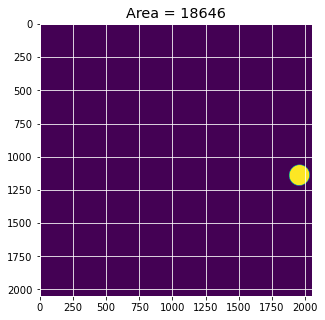

MicroStructure Number,  531
theta =  26.801233671654067
l/b =  1.026349076470748
time for  98  =  23.169983625411987
----------------------------------------------------------------------------


In [ ]:
# define cog here
area = []
cog1 = []
cog2 =[]
theta_array = []
l_array =[]
b_array = []
eig_array =[]
numberOfPpts = []
for i in range(390):
    start = time.time()
    img_track1 = corr.dat_to_numpy(list_files[41+i*5])
    img_track1 = vel.gaussian_filter(img_track1,4)
    img_track1 = (img_track1>0.5)*1
    labels_track1 = hosh.hoshenKoplemanLabels(img_track1)
    numberOfPpts.append(np.max(labels_track1))
    label_for_our_ppt = labels_track1[cog[0]][cog[1]]
    if(label_for_our_ppt==0):
        print('the microstructure dissapeared, or moved very quickly')
        break
        
    image_tracked1_binary = (labels_track1==label_for_our_ppt)*1
    cog = hosh.precipitateCentres(image_tracked1_binary,1)
    theta, l, b, eig = hosh.findAngleMajorMinorEigenvector(image_tracked1_binary,1)
    aa = np.sum(image_tracked1_binary)
    
    area.append(aa)
    cog1.append(cog[0])
    cog2.append(cog[1])
    theta_array.append(theta)
    l_array.append(l)
    b_array.append(b)
    eig_array.append(eig)
    
    plt.imshow(image_tracked1_binary)
    plt.title('Area = '+str(aa))
    plt.show()
    print('MicroStructure Number, ',41+i*5)
    print('theta = ',theta)
    print('l/b = ',l/b)
    print('time for ',i,' = ',time.time()-start)
    
    print('----------------------------------------------------------------------------')
    
    


Text(0.5, 1.0, 'The microstructure when our MS has not started shrinking')

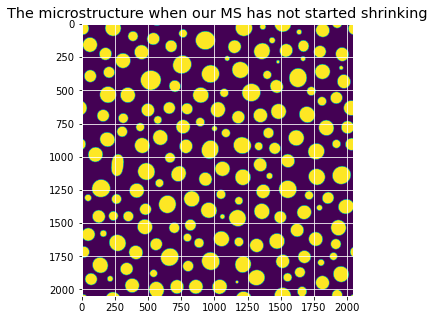

In [113]:
imageInvestigating = corr.dat_to_numpy(list_files[206])
imageInvestigating = vel.gaussian_filter(imageInvestigating,5)
imageInvestigating = (imageInvestigating>0.5)*1
plt.imshow(imageInvestigating)
plt.title('The microstructure when our MS has not started shrinking')

Text(0, 0.5, 'Area in pixels')

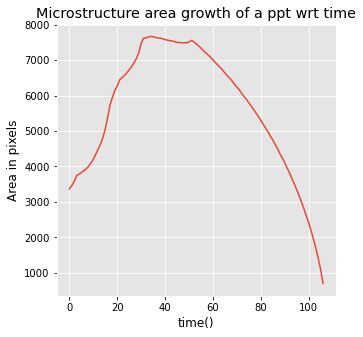

In [106]:
plt.plot(area)
plt.title('Microstructure area growth of a ppt wrt time')
plt.xlabel('time()')
plt.ylabel('Area in pixels')

Text(0, 0.5, 'ratio l/b')

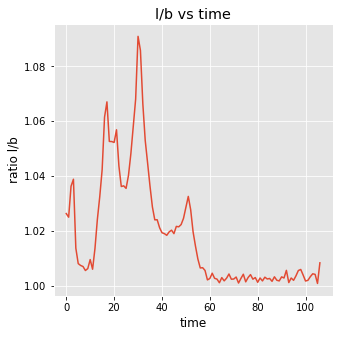

In [103]:
plt.plot(np.array(l_array)/np.array(b_array))
plt.title('l/b vs time')
plt.xlabel('time')
plt.ylabel('ratio l/b')

Text(0, 0.5, 'dA/dt in pixels per time frame')

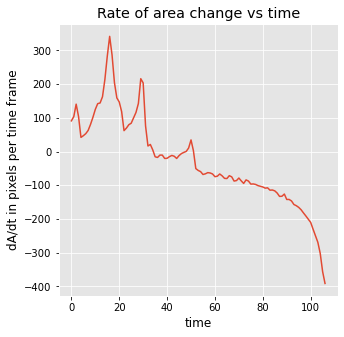

In [108]:
plt.plot(np.gradient(np.array(area)))
plt.title('Rate of area change vs time')
plt.xlabel('time')
plt.ylabel('dA/dt in pixels per time frame')